In [1]:
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
pd.options.mode.chained_assignment = None

In [3]:
train = pd.read_csv('E:/Bike/train.csv')
test = pd.read_csv('E:/Bike/test.csv')
submit = pd.read_csv('E:/Bike/sampleSubmission.csv')

# 檢查是否有空值 

In [4]:
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [8]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


# 特徵工程

### 看 count 的最大值跟平均有一大段距離，有離群值，所以只要超過 3 倍標準差就剔除

In [9]:
print ("Shape Of The Before Ouliers: ",train.shape)
train = train[np.abs(train["count"]-train["count"].mean())<=(3*train["count"].std())] 
print ("Shape Of The After Ouliers: ",train.shape)

Shape Of The Before Ouliers:  (10886, 12)
Shape Of The After Ouliers:  (10739, 12)


In [10]:
data = train.append(test)
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)

In [11]:
data["date"] = data.datetime.apply(lambda x : x.split()[0])
data["hour"] = data.datetime.apply(lambda x : x.split()[1].split(":")[0]).astype("int")
data["year"] = data.datetime.apply(lambda x : x.split()[0].split("-")[0])
data["weekday"] = data.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday())
data["month"] = data.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

In [12]:
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,year,weekday,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0,2011-01-01,0,2011,5,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0,2011-01-01,1,2011,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0,2011-01-01,2,2011,5,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0,2011-01-01,3,2011,5,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0,2011-01-01,4,2011,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17227,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN,2012-12-31,19,2012,0,12
17228,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN,2012-12-31,20,2012,0,12
17229,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN,2012-12-31,21,2012,0,12
17230,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN,2012-12-31,22,2012,0,12


In [14]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

### 風速 0 的數值是不正常的，用隨機森林技巧把 0 做取代

[Text(0.5, 0, 'windspeed'), Text(0.5, 1.0, 'distribution of windspeed')]

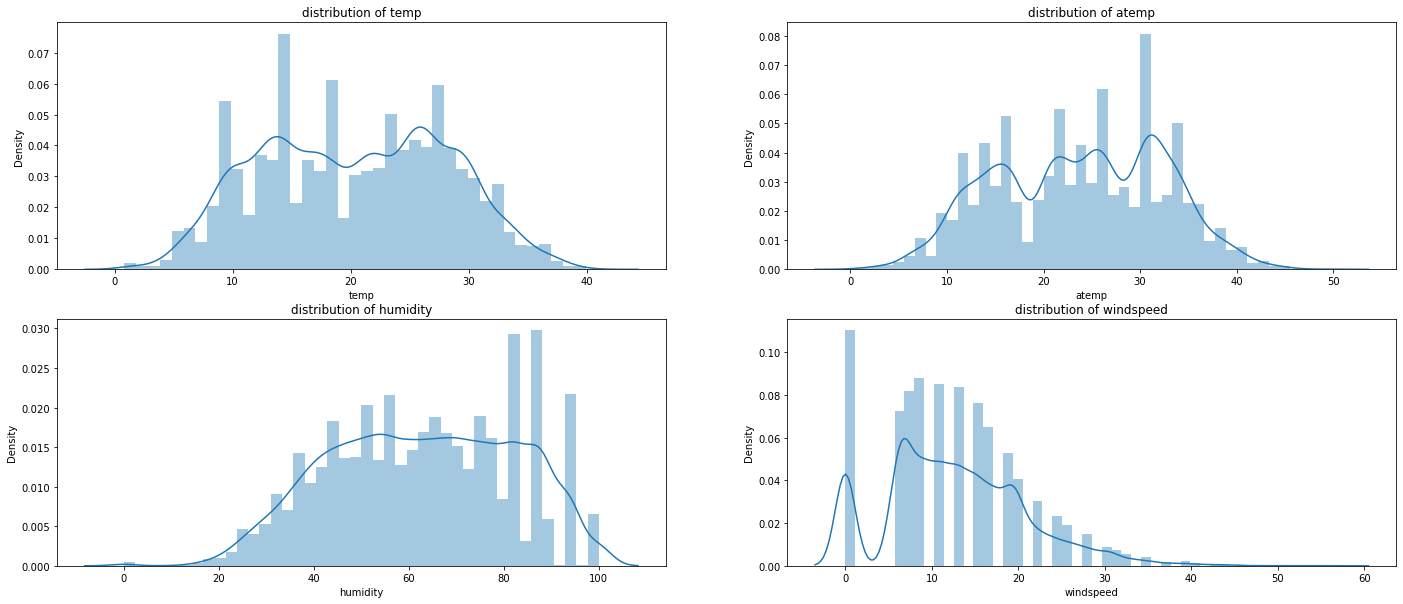

In [16]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(24, 10)
sns.distplot(data["temp"],ax=axes[0][0])
sns.distplot(data["atemp"],ax=axes[0][1])
sns.distplot(data["humidity"],ax=axes[1][0])
sns.distplot(data["windspeed"],ax=axes[1][1])

axes[0][0].set(xlabel='temp',title="distribution of temp")
axes[0][1].set(xlabel='atemp',title="distribution of atemp")
axes[1][0].set(xlabel='humidity',title="distribution of humidity")
axes[1][1].set(xlabel='windspeed',title="distribution of windspeed")

In [19]:
dataWind0 = data[data["windspeed"] == 0] ; dataWind0

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,year,weekday,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,2011-01-01,0,2011,5,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,2011-01-01,1,2011,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,2011-01-01,2,2011,5,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,2011-01-01,3,2011,5,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,2011-01-01,4,2011,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17172,2012-12-29 12:00:00,1,0,0,3,8.20,12.120,100,0.0,NaN,NaN,NaN,2012-12-29,12,2012,5,12
17173,2012-12-29 13:00:00,1,0,0,3,8.20,12.120,100,0.0,NaN,NaN,NaN,2012-12-29,13,2012,5,12
17175,2012-12-29 15:00:00,1,0,0,2,9.84,12.120,87,0.0,NaN,NaN,NaN,2012-12-29,15,2012,5,12
17183,2012-12-29 23:00:00,1,0,0,2,10.66,12.120,60,0.0,NaN,NaN,NaN,2012-12-29,23,2012,5,12


In [20]:
dataWindNot0 = data[data["windspeed"]!=0] ; dataWindNot0

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,year,weekday,month
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0.0,1.0,1.0,2011-01-01,5,2011,5,1
10,2011-01-01 10:00:00,1,0,0,1,15.58,19.695,76,16.9979,12.0,24.0,36.0,2011-01-01,10,2011,5,1
11,2011-01-01 11:00:00,1,0,0,1,14.76,16.665,81,19.0012,26.0,30.0,56.0,2011-01-01,11,2011,5,1
12,2011-01-01 12:00:00,1,0,0,1,17.22,21.210,77,19.0012,29.0,55.0,84.0,2011-01-01,12,2011,5,1
13,2011-01-01 13:00:00,1,0,0,2,18.86,22.725,72,19.9995,47.0,47.0,94.0,2011-01-01,13,2011,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17227,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN,2012-12-31,19,2012,0,12
17228,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN,2012-12-31,20,2012,0,12
17229,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN,2012-12-31,21,2012,0,12
17230,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN,2012-12-31,22,2012,0,12


In [21]:
rfModel_wind = RandomForestRegressor(n_estimators = 1000, random_state = 42)
windColumns = ["season", "weather", "humidity", "month", "temp", "year", "atemp"]
rfModel_wind.fit(dataWindNot0[windColumns], dataWindNot0["windspeed"])

RandomForestRegressor(n_estimators=1000, random_state=42)

In [23]:
wind0Values = rfModel_wind.predict(X= dataWind0[windColumns]) ; wind0Values

array([ 6.97859907,  6.72315889,  6.72315889, ...,  7.44930512,
       25.85970089,  7.03332805])

In [24]:
dataWind0.loc[:, "windspeed"] = wind0Values
data = dataWindNot0.append(dataWind0)
data.reset_index(inplace = True)
data.drop('index', inplace = True, axis = 1)

<AxesSubplot:xlabel='windspeed', ylabel='Density'>

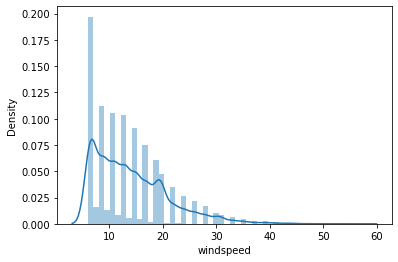

In [25]:
sns.distplot(data["windspeed"])

In [26]:
dataTrain = data[pd.notnull(data['count'])].sort_values(by = ["datetime"]) ; dataTrain

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,year,weekday,month
15068,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,6.978599,3.0,13.0,16.0,2011-01-01,0,2011,5,1
15069,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,6.723159,8.0,32.0,40.0,2011-01-01,1,2011,5,1
15070,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,6.723159,5.0,27.0,32.0,2011-01-01,2,2011,5,1
15071,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,6.695585,3.0,10.0,13.0,2011-01-01,3,2011,5,1
15072,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,6.695585,0.0,1.0,1.0,2011-01-01,4,2011,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9437,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.002700,7.0,329.0,336.0,2012-12-19,19,2012,2,12
9438,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.001300,10.0,231.0,241.0,2012-12-19,20,2012,2,12
9439,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.001300,4.0,164.0,168.0,2012-12-19,21,2012,2,12
9440,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.003200,12.0,117.0,129.0,2012-12-19,22,2012,2,12


In [27]:
dataTest = data[~pd.notnull(data['count'])].sort_values(by = ["datetime"]) ; dataTest

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,year,weekday,month
9442,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.002700,NaN,NaN,NaN,2011-01-20,0,2011,3,1
16365,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,8.793563,NaN,NaN,NaN,2011-01-20,1,2011,3,1
16366,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,8.793563,NaN,NaN,NaN,2011-01-20,2,2011,3,1
9443,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.001400,NaN,NaN,NaN,2011-01-20,3,2011,3,1
9444,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.001400,NaN,NaN,NaN,2011-01-20,4,2011,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15063,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.001400,NaN,NaN,NaN,2012-12-31,19,2012,0,12
15064,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.001400,NaN,NaN,NaN,2012-12-31,20,2012,0,12
15065,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.001400,NaN,NaN,NaN,2012-12-31,21,2012,0,12
15066,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.998100,NaN,NaN,NaN,2012-12-31,22,2012,0,12


In [38]:
dropFeatures = ['casual',"count","datetime","date","registered"]
dataTrain  = dataTrain.drop(dropFeatures,axis=1)
dataTest  = dataTest.drop(dropFeatures,axis=1)

In [29]:
yLabels = dataTrain["count"] ; yLabels

15068     16.0
15069     40.0
15070     32.0
15071     13.0
15072      1.0
         ...  
9437     336.0
9438     241.0
9439     168.0
9440     129.0
9441      88.0
Name: count, Length: 10739, dtype: float64

### 0 的數值很多，且 kernel 為右偏，取 ln 做調整 

<AxesSubplot:xlabel='count', ylabel='Density'>

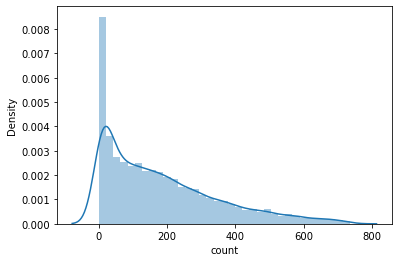

In [30]:
sns.distplot(yLabels)

In [31]:
yLabelsLog = np.log(yLabels) ; yLabelsLog

15068    2.772589
15069    3.688879
15070    3.465736
15071    2.564949
15072    0.000000
           ...   
9437     5.817111
9438     5.484797
9439     5.123964
9440     4.859812
9441     4.477337
Name: count, Length: 10739, dtype: float64

<AxesSubplot:xlabel='count', ylabel='Density'>

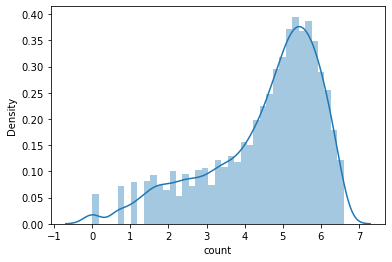

In [32]:
sns.distplot(yLabelsLog)

In [39]:
rfModel = RandomForestRegressor(n_estimators=1000,random_state=42)
rfModel.fit(dataTrain, yLabelsLog)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [40]:
preds = rfModel.predict(X = dataTrain) ; preds

array([2.98653831, 3.4419026 , 3.21407121, ..., 5.1705029 , 4.93288879,
       4.55005981])

In [41]:
predsTest = rfModel.predict(X = dataTest)
submission = pd.DataFrame({
        "datetime": datetimecol,
        "count": [max(0, x) for x in np.exp(predsTest)]
    })
submission.to_csv('E:/Bike/bike_predictions_RF.csv', index = False)